In [4]:
import pandas as pd
from senxor.utils import remap, cv_render
import cv2 as cv
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
sample_thermal_readings = r"C:\Users\takao\Desktop\YoloV8 Data\sample_thermal_readings.csv"
df = pd.read_csv(sample_thermal_readings)
df.head()

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_13790,px_13791,px_13792,px_13793,px_13794,px_13795,px_13796,px_13797,px_13798,px_13799
0,28.45,28.34,26.45,27.84,25.25,25.55,24.45,23.95,23.95,25.05,...,31.55,32.16,29.66,31.75,34.06,30.95,30.95,32.75,32.56,34.34
1,28.39,28.44,26.39,27.45,25.36,25.62,24.44,24.00,23.94,25.08,...,31.56,32.16,29.72,31.73,33.20,30.90,31.03,32.72,32.56,34.38
2,28.45,28.36,26.48,27.34,25.40,25.64,24.48,24.05,23.86,24.70,...,31.50,32.16,29.78,31.61,33.22,31.12,31.11,32.72,32.75,34.28
3,28.45,28.36,26.69,27.36,25.39,25.62,24.34,24.06,23.36,24.73,...,31.52,32.00,29.92,31.11,32.94,31.11,31.10,32.60,32.78,34.44
4,28.34,28.48,26.73,27.38,25.40,25.72,24.39,24.16,23.38,24.64,...,31.50,32.00,29.94,31.20,32.94,31.34,31.16,32.60,32.80,34.38


In [11]:
def display(row):
    frame = row.reshape(120,115)
    img = cv_render(remap(frame),
              resize=(frame.shape[1]*4,frame.shape[0]*4),
              colormap='rainbow2',
              display=False)
    
    return cv.cvtColor(img, cv.COLOR_RGB2BGR)

def upsample_display(row):
    frame = row.reshape(120,115)
    img = cv_render(remap(frame),
              resize=(frame.shape[1],frame.shape[0]),
              colormap='rainbow2',
              display=False)
    sr = cv.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(r"ESPCN_x4.pb")
    sr.setModel("espcn",4)
    return cv.cvtColor(sr.upsample(img), cv.COLOR_RGB2BGR)

def preview_comp(idx):
    samp_row = df.iloc[idx].to_numpy()
    fig, ax = plt.subplots(figsize=(12,6), ncols=2)
    ax[0].imshow(display(samp_row))
    ax[1].imshow(upsample_display(samp_row))
    plt.show()

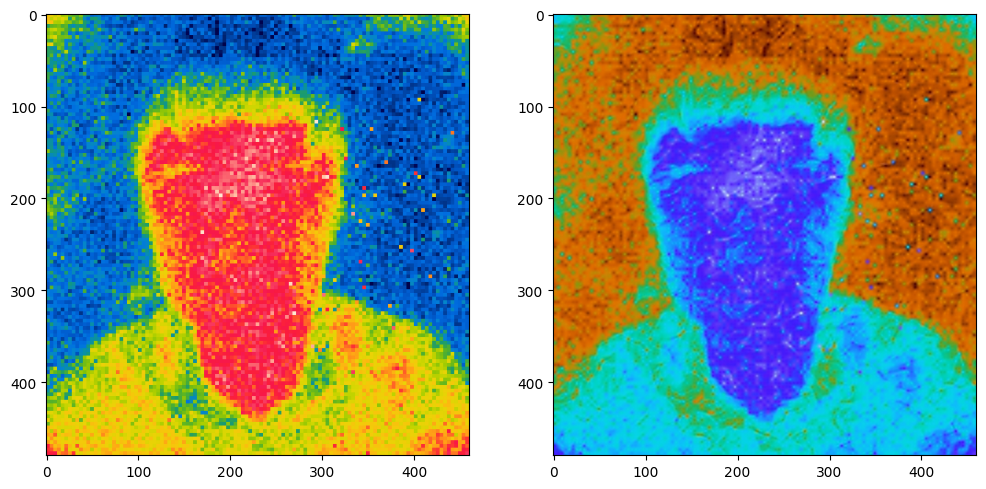

In [13]:
preview_comp(0)

In [ ]:
best_M = np.array([[1.15879826e+00,1.98254068e-01,-3.82725310e+01],
              [1.46173730e-02,1.99701285e+00,-1.63647552e+02],
              [-4.94082740e-04,1.24362170e-03,1.00000000e+00]])


In [ ]:
def calculate_new_coords(x, y, M):
    v = np.array([x, y, 1])
    res = np.array([np.dot(M[0], v),np.dot(M[1], v)])/np.dot(M[2], v)
    return tuple(res.astype(int))

all_transform_coords = Counter()
for i in range(480):
    for j in range(460):
        all_transform_coords[calculate_new_coords(i, j, best_M)] += 1

In [ ]:
all_transform_coords.most_common(10)